# Formula for Covariance
The *covariance* formula is similar to the formula for *correlation* and deals with the calculation of data points from the average value in a dataset. 

For example, the *covariance* between two random variables X and Y can be calculated using the following formula (for *population*):

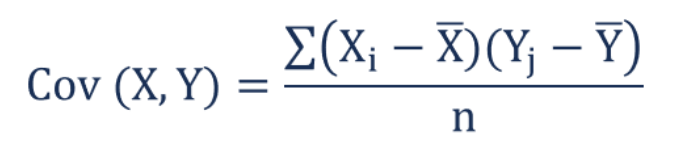

For a *sample covariance*, the formula is slightly adjusted:

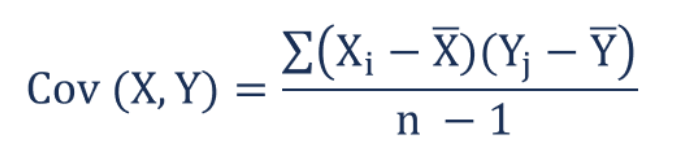

Where:

- Xi – the values of the X-variable
- Yj – the values of the Y-variable
- X̄ – the mean (average) of the X-variable
- Ȳ – the mean (average) of the Y-variable
- n – the number of the data points
 

# Covariance vs. Correlation
Covariance and correlation both primarily assess the relationship between variables. The closest analogy to the relationship between them is the relationship between the variance and standard deviation.

Covariance measures the total variation of two random variables from their expected values. Using covariance, we can only gauge the direction of the relationship (whether the variables tend to move in tandem or show an inverse relationship). However, it does not indicate the strength of the relationship, nor the dependency between the variables.

On the other hand, *correlation* measures the strength of the relationship between variables. Correlation is the scaled measure of covariance. It is dimensionless. In other words, the correlation coefficient is always a pure value and not measured in any units.

The relationship between the two concepts can be expressed using the formula below:

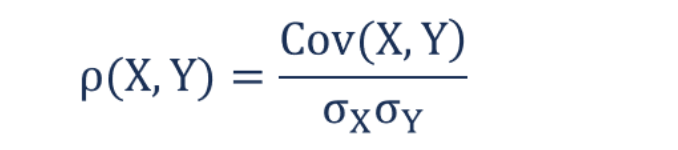

Where:

- ρ(X,Y) – the correlation between the variables X and Y
- Cov(X,Y) – the covariance between the variables X and Y
- σX – the standard deviation of the X-variable
- σY – the standard deviation of the Y-variable

In [1]:
# import necessary tools
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib
from matplotlib import pyplot
# seed random number generator
seed(1)

### Test Dataset
Before we look at correlation methods, let’s define a dataset we can use to test the methods.

We will generate 1,000 samples of two variables with a strong positive correlation. The first variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20. The second variable will be values from the first variable with Gaussian noise added with a mean of a 50 and a standard deviation of 10.

We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.

The pseudorandom number generator is seeded (at the top of this notebook) to ensure that we get the same sample of numbers each time the code is run.

In [2]:
# generate related variables

# prepare data
# adding 100 makes the mean 100 and multiplying by 20 makes the std 20.
data1 = 20 * randn(1000) + 100 
# add "noise" to the first data. The noise has a mean of 50 and std of 10.
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


The following shows a scatter plot of the two variables. Because we contrived the dataset, we know there is a relationship between the two variables. This is clear when we review the generated scatter plot where we can see an increasing trend.

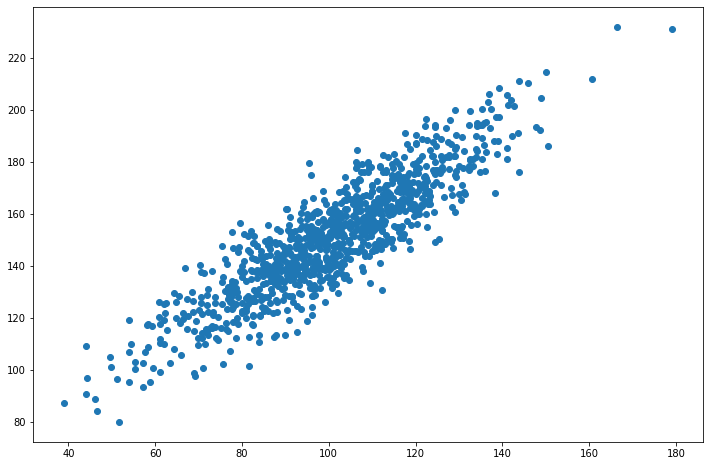

In [3]:
# plot
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
pyplot.scatter(data1, data2)
pyplot.show()

Before we look at calculating some correlation scores, we must first look at an important statistical building block, called covariance.

### Covariance
Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

The calculation of the sample covariance shown previously, but in pseudocode:
```
cov(X, Y) = sum( (x - mean(X)) * (y - mean(Y)) ) / (n-1)
```

The use of the mean in the calculation suggests the need for each data sample to have a Gaussian or Gaussian-like distribution.

The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent.

The cov() NumPy function can be used to calculate a covariance matrix between two or more variables.

```
covariance = cov(data1, data2)
```
The diagonal of the matrix contains the covariance between each variable and itself. The other values in the matrix represent the covariance between the two variables; in this case, the remaining two values are the same given that we are calculating the covariance for only two variables.

We can calculate the covariance matrix for the two variables in our test problem.

In [4]:
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


The covariance and covariance matrix are used widely within statistics and multivariate analysis to characterize the relationships between two or more variables.

Running the example calculates and prints the covariance matrix.

Because the dataset was contrived with each variable drawn from a Gaussian distribution and the variables linearly correlated, covariance is a reasonable method for describing the relationship.

The covariance between the two variables is 389.75. We can see that it is positive, suggesting the variables change in the same direction as we expect.

A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next.

### Pearson’s Correlation
The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.
```
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
```
The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

The pearsonr() SciPy function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.

We can calculate the correlation between the two variables in our test problem.

The complete example is listed below.

In [5]:
# calculate the Pearson's correlation between two variables
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


Running the example calculates and prints the Pearson’s correlation coefficient.

We can see that the two variables are positively correlated and that the correlation is 0.8. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.
```
Pearsons correlation: 0.888
```
The Pearson’s correlation coefficient can be used to evaluate the relationship between more than two variables.

This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.

### Spearman’s Correlation
Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.
```
Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
```
A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

This site has an excellent explanation of a Spearman's correlation and of a monotonic relationship: https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.

The spearmanr() SciPy function can be used to calculate the Spearman’s correlation coefficient between two data samples with the same length.

We can calculate the correlation between the two variables in our test problem.

The complete example is listed below.

In [6]:
# calculate the spearmans's correlation between two variables
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


Running the example calculates and prints the Spearman’s correlation coefficient.

We know that the data is Gaussian and that the relationship between the variables is linear. Nevertheless, the nonparametric rank-based approach shows a strong correlation between the variables of 0.8.
```
Spearmans correlation: 0.872
```
As with the Pearson’s correlation coefficient, the coefficient can be calculated pair-wise for each variable in a dataset to give a correlation matrix for review.